# Earthquakes and oil mining in Oklahoma
> Of course, earthquakes have a big impact on society, and recently are connected to human activity. In this final chapter, you'll investigate the effect that increased injection of saline wastewater due to oil mining in Oklahoma has had on the seismicity of the region. This is the Summary of lecture "Case Studies in Statistical Thinking", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics]
- image: images/compare_mag_okh.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dc_stat_think as dcst

plt.rcParams['figure.figsize'] = (10, 5)

## Variations in earthquake frequency and seismicity


### EDA: Plotting earthquakes over time
Make a plot where the y-axis is the magnitude and the x-axis is the time of all earthquakes in Oklahoma between 1980 and the first half of 2017. Each dot in the plot represents a single earthquake. 

In [2]:
df = pd.read_csv('./dataset/oklahoma_earthquakes_1950-2017.csv', skiprows=2)
df.head()

time  latitude  longitude  depth  mag magType  nst  gap  \
0  1974-12-16 02:30:21.400    35.330    -97.480   10.0  2.6      ml  NaN  NaN   
1  1975-09-13 01:25:02.800    34.139    -97.369    5.0  3.4      lg  NaN  NaN   
2  1975-10-12 02:58:11.200    34.816    -97.406   20.0  3.2      lg  NaN  NaN   
3  1975-11-29 14:29:40.900    34.521    -97.347    5.0  3.5      lg  NaN  NaN   
4  1976-04-16 18:59:44.200    36.107    -99.875    5.0  3.4     NaN  NaN  NaN   

   dmin  rms  ... depthError magError magNst    status locationSource  \
0   NaN  NaN  ...        NaN      NaN    NaN  reviewed              m   
1   NaN  NaN  ...        NaN      NaN    NaN  reviewed             us   
2   NaN  NaN  ...        NaN      NaN    NaN  reviewed             us   
3   NaN  NaN  ...        NaN      NaN    NaN  reviewed             us   
4   NaN  NaN  ...        NaN      NaN    NaN  reviewed             us   

   magSource   loc_name  loc_admin1        loc_admin2 loc_cc  
0        tul      Moore    Oklahoma  Cleveland County     US  
1        tul     Wilson    Oklahoma     Carter County     US  
2        tul  Maysville    Oklahoma     Garvin County     US  
3        slm  Wynnewood    Oklahoma     Garvin County     US  
4        tul     Arnett    Oklahoma      Ellis County     US  

[5 rows x 26 columns]

In [3]:
from datetime import datetime as dt
import time
# Resource: https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [4]:
times = pd.to_datetime(df['time']).apply(toYearFraction).to_numpy()
mags = df['mag'].to_numpy()

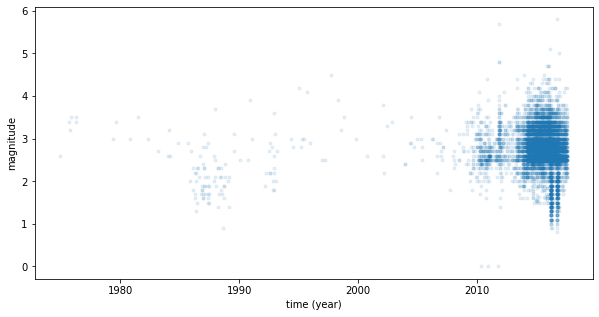

In [5]:
# Plot time vs. magnitude
_ = plt.plot(times, mags, marker='.', linestyle='none', alpha=0.1)

# Label axes
_ = plt.xlabel('time (year)')
_ = plt.ylabel('magnitude')

### Estimates of the mean interearthquake times
The graphical EDA in the last exercise shows an obvious change in earthquake frequency around 2010. To compare, compute the mean time between earthquakes of magnitude 3 and larger from 1980 through 2009 and also from 2010 through mid-2017. Also include 95% confidence intervals of the mean. The variables dt_pre and dt_post respectively contain the time gap between all earthquakes of magnitude at least 3 from pre-2010 and post-2010 in units of days.



In [6]:
df_over3 = df[df['mag'] >= 3]
df_over3['time'] = pd.to_datetime(df_over3['time']).copy()
df_over3

/home/chanseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


time  latitude  longitude   depth  mag magType  nst  \
1    1975-09-13 01:25:02.800   34.1390   -97.3690   5.000  3.4      lg  NaN   
2    1975-10-12 02:58:11.200   34.8160   -97.4060  20.000  3.2      lg  NaN   
3    1975-11-29 14:29:40.900   34.5210   -97.3470   5.000  3.5      lg  NaN   
4    1976-04-16 18:59:44.200   36.1070   -99.8750   5.000  3.4     NaN  NaN   
5    1976-04-19 04:42:42.200   36.1340   -99.8410   5.000  3.5     NaN  NaN   
...                      ...       ...        ...     ...  ...     ...  ...   
8972 2017-07-17 03:29:22.050   36.2482   -98.4378   1.990  3.2   mb_lg  NaN   
8973 2017-07-17 03:51:18.700   35.8628   -96.6819   6.806  3.2      ml  NaN   
8974 2017-07-17 21:06:34.200   36.4454   -97.0626   5.966  3.3      ml  NaN   
8975 2017-07-18 02:32:30.360   36.6221   -98.4302   5.000  3.6   mb_lg  NaN   
8977 2017-07-18 21:59:52.270   35.8749   -96.6953   4.950  3.0   mb_lg  NaN   

       gap   dmin   rms  ... depthError magError magNst    status  \
1      NaN    NaN   NaN  ...        NaN      NaN    NaN  reviewed   
2      NaN    NaN   NaN  ...        NaN      NaN    NaN  reviewed   
3      NaN    NaN   NaN  ...        NaN      NaN    NaN  reviewed   
4      NaN    NaN   NaN  ...        NaN      NaN    NaN  reviewed   
5      NaN    NaN   NaN  ...        NaN      NaN    NaN  reviewed   
...    ...    ...   ...  ...        ...      ...    ...       ...   
8972  24.0  0.245  0.30  ...        6.8    0.051  100.0  reviewed   
8973  42.0    NaN  0.37  ...        3.2      NaN    NaN  reviewed   
8974  33.0    NaN  0.34  ...        4.1      NaN    NaN  reviewed   
8975  30.0  0.240  0.56  ...        2.0    0.054   90.0  reviewed   
8977  50.0  0.089  0.30  ...        3.3    0.050  106.0  reviewed   

     locationSource  magSource   loc_name  loc_admin1      loc_admin2 loc_cc  
1                us        tul     Wilson    Oklahoma   Carter County     US  
2                us        tul  Maysville    Oklahoma   Garvin County     US  
3                us        slm  Wynnewood    Oklahoma   Garvin County     US  
4                us        tul     Arnett    Oklahoma    Ellis County     US  
5                us        tul     Arnett    Oklahoma    Ellis County     US  
...             ...        ...        ...         ...             ...    ...  
8972             us         us   Fairview    Oklahoma    Major County     US  
8973            tul        tul     Stroud    Oklahoma  Lincoln County     US  
8974            tul        tul     McCord    Oklahoma    Osage County     US  
8975             us         us   Cherokee    Oklahoma  Alfalfa County     US  
8977             us         us    Cushing    Oklahoma    Payne County     US  

[2508 rows x 26 columns]

In [7]:
dt_pre_df = df_over3[(df_over3['time'].dt.year < 2010) & (df_over3['time'].dt.year >= 1980)]
dt_post_df = df_over3[df_over3['time'].dt.year >= 2010]

In [8]:
dt_pre = dt_pre_df.time.diff().dt.total_seconds().apply(lambda x: x / 86400).to_numpy()[1:]
dt_post = dt_post_df.time.diff().dt.total_seconds().apply(lambda x: x / 86400).to_numpy()[1:]

In [9]:
dt_pre

array([2.51464274e+02, 2.95448234e+02, 6.40863624e+02, 1.08647905e+03,
       3.17398881e+02, 5.90184145e+02, 4.83233923e+02, 6.97192766e+01,
       6.93095571e+02, 2.84084049e+01, 4.69432503e+02, 2.64515749e+02,
       7.65691760e+01, 5.69709848e+01, 1.05820879e+02, 7.22962820e+02,
       2.33607648e+02, 7.01886896e+01, 1.14955992e+02, 3.60235141e+02,
       8.36699482e+02, 1.11743014e+02, 1.41681284e+02, 5.96914548e+02,
       1.67977123e+02, 1.50232531e+02, 3.27134280e+02, 2.14277463e+01,
       1.84143676e+02, 2.32951451e+02, 3.79080845e+02, 1.42725851e+02,
       8.97876019e+01, 5.96111736e+00, 1.89721845e+01, 2.77162708e+00,
       1.13697293e+01, 9.83503366e+01, 1.19944992e+01, 4.82748252e+00,
       2.03827727e+01, 3.62473927e+01, 7.40873495e-01, 5.60745802e+01,
       2.23031436e+01, 1.99971991e+00, 6.99775810e-01, 1.19004729e+01,
       8.67183507e+00, 4.74282720e+00, 8.78014236e-01, 6.85203079e+00])

In [10]:
dt_post

array([1.21727083, 0.00597188, 1.92131238, ..., 0.7189294 , 0.22634444,
       0.81067025])

In [11]:
# Compute mean interearthquake time
mean_dt_pre = np.mean(dt_pre)
mean_dt_post = np.mean(dt_post)

# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post, np.mean, size=10000)

# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre, [2.5, 97.5])
conf_int_post = np.percentile(bs_reps_post, [2.5, 97.5])

# Print the results
print("""1980 through 2009
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))

1980 through 2009
mean time gap: 204.61 days
95% conf int: [139.84, 276.32] days

2010 through mid-2017
mean time gap: 1.12 days
95% conf int: [0.97, 1.29] days


### Hypothesis test: did earthquake frequency change?
Obviously, there was a massive increase in earthquake frequency once wastewater injection began. Nonetheless, you will still do a hypothesis test for practice. You will not test the hypothesis that the interearthquake times have the same distribution before and after 2010, since wastewater injection may affect the distribution. Instead, you will assume that they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as your test statistic.



In [12]:
# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift, np.mean, size=10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

# Compute and print the p-value
p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p =', p_val)

p = 0.0


In 10,000 samples, not one had a test statistic greater than was was observed. The p-value is, predictably based on what we have done so far, is tiiiiiny!

## Earthquake magnitudes in Oklahoma
- Magnitudes in Oklahoma
    - Verify that the Gutenberg-Richter Law holds before and after 2010
    - Compute b-values
    - Perform hypothesis test

### EDA: Comparing magnitudes before and after 2010
Make an ECDF of earthquake magnitudes from 1980 through 2009. On the same plot, show an ECDF of magnitudes of earthquakes from 2010 through mid-2017.

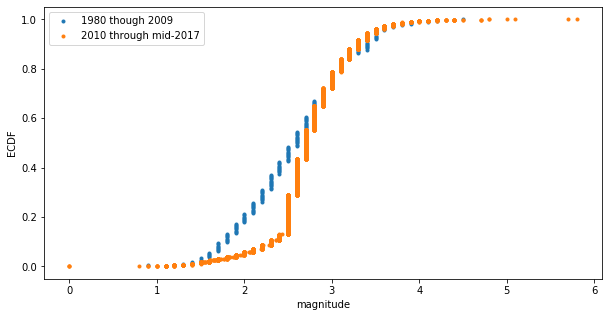

In [14]:
# Get magnitudes before and after 2010
mags_pre = mags[times < 2010]
mags_post = mags[times >= 2010]

# Generate ECDFs
_ = plt.plot(*dcst.ecdf(mags_pre), marker='.', linestyle='none')
_ = plt.plot(*dcst.ecdf(mags_post), marker='.', linestyle='none')

# Label axes
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left');

### Quantification of the b-values
Based on the plot you generated in the previous exercise, you can safely use a completeness threshold of mt = 3. Using this threshold, compute b-values for the period between 1980 and 2009 and for 2010 through mid-2017.

In [104]:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]
    
    # Compute b-value: b
    b = (np.mean(m) - mt) * np.log(10)
    
    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, n_reps)
        
        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)
        
        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
        
        return b, conf_int

In [105]:
mt = 3

In [106]:
# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5], n_reps=10000)

# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5], n_reps=10000)

# Report the results
print("""
1980 through 2009
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))


1980 through 2009
b-value: 0.75
95% conf int: [0.56, 0.94]

2010 through mid-2017
b-value: 0.62
95% conf int: [0.60, 0.65]



 The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get these results if the b-values are actually the same.

### Hypothesis test: are the b-values different?
Perform the hypothesis test sketched out on the previous exercise. 

In [109]:
# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_post) - np.mean(mags_pre)

# Generate permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(mags_post, mags_pre, dcst.diff_of_means, size=10000)

# Compute and print p-value
p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

p = 0.0817


A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in b-value after wastewater injection began.